# Section 1: Business Understanding

Objective: Create a model to predict UK GDP growth using macroeconomic features

Business Question 1:  How accurately can we forecast UK GDP growth using macroeconomic features like inflation, unemployment, lending rates, and consumer prices?

Business Question 2: What relationships do we observe between our macroeconomic features and GDP growth rate?

Business Question 3: How well can the model handle external shocks?

# Section 2: Data Understanding

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# Gather Data

Start by loading the data

In [10]:
df=pd.read_csv('GDP_GROWTH.csv')

# Assess Data

After loading the data, conduct an initial assessment of the data, prior to cleaning the data to see what needs to be done

In [13]:
df.head(50)

,Time,GDP growth (annual %),"Inflation, consumer prices (annual %)",GDP (constant LCU),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)"
0,1975,-1.473649,24.207288,8.810000e+11,10.467692,4
1,1976,2.910266,16.559523,9.070000e+11,11.100950,5.5
2,1977,2.457750,15.840267,9.290000e+11,8.911867,5.8
3,1978,4.204261,8.263141,9.680000e+11,9.093150,5.7
4,1979,3.749017,13.421280,1.000000e+12,13.694808,5.3
5,1980,-2.031368,17.965924,9.840000e+11,16.312683,6.8
6,1981,-0.787744,11.876627,9.760000e+11,13.255000,10.4
7,1982,1.994891,8.598864,9.960000e+11,11.930967,10.9
8,1983,4.221856,4.609303,1.040000e+12,9.825267,11.088
9,1984,2.269105,4.960711,1.060000e+12,9.680100,10.901


Data Source: World Bank Databank

Columns:

Year (time index): From 1975 - 2024

GDP growth (annual %) – target variable

Inflation, consumer prices (annual %)

GDP (constant LCU) – size of the economy in local currency units

Lending interest rate (%)

Unemployment, total (% of total labor force)

GDP (constant LCU) steadily increases, which is consistent with real-world growth in economic output. However this consistency means it may not be good for modelling GDP growth, and hence can be excluded.

In [15]:
df.replace('..', np.nan, inplace=True)
print(df.describe())
print(df.isna().sum())

             Time  GDP growth (annual %)  \
count    50.00000              50.000000   
mean   1999.50000               2.057857   
std      14.57738               2.777574   
min    1975.00000             -10.296919   
25%    1987.25000               1.431142   
50%    1999.50000               2.473868   
75%    2011.75000               3.184065   
max    2024.00000               8.575951   

       Inflation, consumer prices (annual %)  GDP (constant LCU)  \
count                              50.000000        5.000000e+01   
mean                                4.952546        1.639220e+12   
std                                 5.016581        4.927270e+11   
min                                 0.368047        8.810000e+11   
25%                                 1.993583        1.217500e+12   
50%                                 2.635365        1.665000e+12   
75%                                 5.993608        2.030000e+12   
max                                24.207288        2.43000

In [12]:
df[['Time', 'Unemployment, total (% of total labor force) (national estimate)']].tail()

,Time,"Unemployment, total (% of total labor force) (national estimate)"
45,2020,4.518
46,2021,4.865
47,2022,3.768
48,2023,4.025
49,2024,..


Data quality checks:

Missing values:

Unemployment is NaN in 2024 (Addressed in Section 3)

Initial EDA:

GDP growth: range ≈ -10.3% (2020, COVID crash) to +8.6% (2021, rebound).

Inflation: very high in late 1970s (20%+). Stabilizes around 2–3%.

Lending interest rate:

Very high in 1980s (up to ~16%).

Drops sharply after 2009, impact of financial crisis.

Unemployment:

Spikes early 1980s (~11%).

Declines to ~3.7% by 2019.

Slight rise post-COVID.

For visualisations, please see Section 3 - Analyse Data

# Section 3 Data preperation

# Cleaning the data

In [17]:
print(df.isna().sum())

Time                                                                0
GDP growth (annual %)                                               0
Inflation, consumer prices (annual %)                               0
GDP (constant LCU)                                                  0
Lending interest rate (%)                                           0
Unemployment, total (% of total labor force) (national estimate)    1
dtype: int64


In [16]:
df[['Time', 'Unemployment, total (% of total labor force) (national estimate)']].tail()

,Time,"Unemployment, total (% of total labor force) (national estimate)"
45,2020,4.518
46,2021,4.865
47,2022,3.768
48,2023,4.025
49,2024,NaN


The Unemployment column has only one missing value in 2024, as shown above. Further resarch was conducted to try and observe if there was a stat for 2024 unemployment, but none was found. The missing value was  Since it is one value, and unemployment does not tend to exhibit large changes between years, we implemented linear interpolation. Due to it being one value, it should not affect results drastically. The nature of unemployment data also shows unemploy,ent rate change gradually over time, not in sudden random jumps, making linear interpolation a reasonable approximation.

Linear interpolation is justified because unemployment evolves smoothly over time, only one value is missing, and this method provides a simple, reliable estimate without distorting the historical economic trend.

In [18]:
df['Unemployment, total (% of total labor force) (national estimate)'] = df['Unemployment, total (% of total labor force) (national estimate)'].astype(float)
df['Unemployment, total (% of total labor force) (national estimate)'].interpolate(method='linear', inplace=True)

/tmp/ipykernel_13/830128195.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Unemployment, total (% of total labor force) (national estimate)'].interpolate(method='linear', inplace=True)


ffill() is required as Uneployment has null values. NB: modelling cannot be done if there are NA values

In [134]:
df.ffill(inplace=True)
df.tail()

,Year,GDP growth (annual %),"Inflation, consumer prices (annual %)",GDP (constant LCU),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)"
45,2020,-10.296919,0.989487,2.100000e+12,0.2000,4.518
46,2021,8.575951,2.518371,2.280000e+12,0.1125,4.865
47,2022,4.839085,7.922049,2.390000e+12,1.5400,3.768
48,2023,0.397082,6.793967,2.400000e+12,4.7290,4.025
49,2024,1.100668,3.271573,2.430000e+12,5.0000,4.025


Rename Time column to year, to make this column much more easier to understand what it is showing

In [125]:
df.rename(columns={'Time': 'Year'}, inplace=True)
df.head()

,Year,GDP growth (annual %),"Inflation, consumer prices (annual %)",GDP (constant LCU),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)"
0,1975,-1.473649,24.207288,8.810000e+11,10.467692,4
1,1976,2.910266,16.559523,9.070000e+11,11.100950,5.5
2,1977,2.457750,15.840267,9.290000e+11,8.911867,5.8
3,1978,4.204261,8.263141,9.680000e+11,9.093150,5.7
4,1979,3.749017,13.421280,1.000000e+12,13.694808,5.3


Convert this column to a datetime format, to allow easier analysis to be conducted

In [126]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
df.head()

,Year,GDP growth (annual %),"Inflation, consumer prices (annual %)",GDP (constant LCU),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)"
0,1975,-1.473649,24.207288,8.810000e+11,10.467692,4
1,1976,2.910266,16.559523,9.070000e+11,11.100950,5.5
2,1977,2.457750,15.840267,9.290000e+11,8.911867,5.8
3,1978,4.204261,8.263141,9.680000e+11,9.093150,5.7
4,1979,3.749017,13.421280,1.000000e+12,13.694808,5.3


# Analyse Data

Create a initial plot that plots the macroeconomic features and target features to see some initial observations

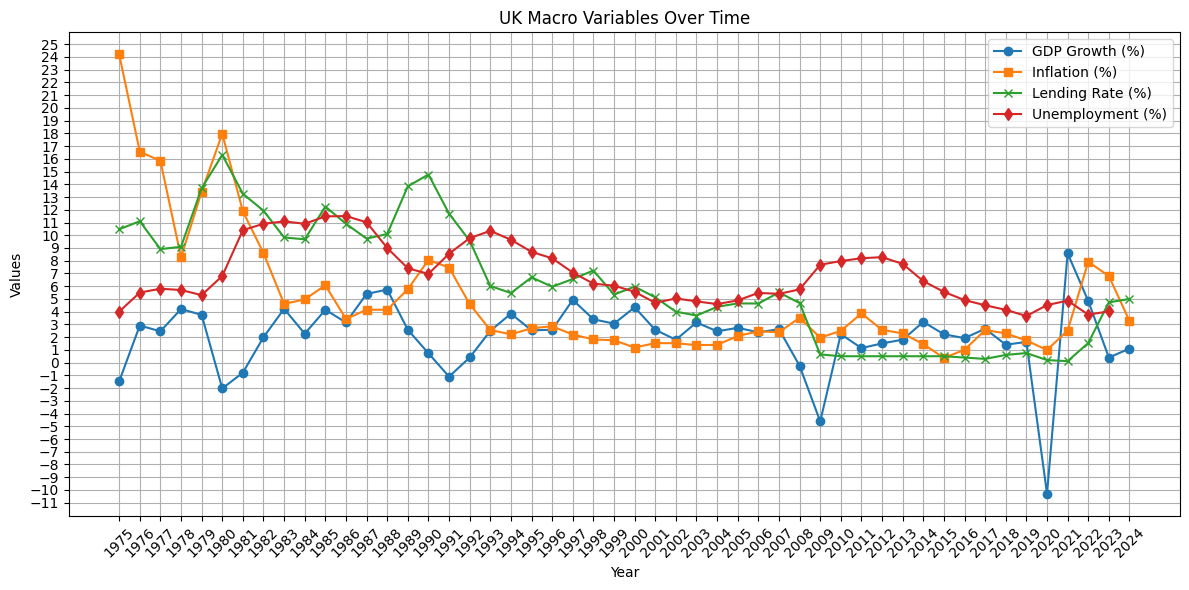

In [129]:


def plot_uk_macro(df):
    """
    Plots key UK macroeconomic variables over time in a single line chart.
    
    Description:
        This function visualises trends in GDP growth, inflation, lending interest rate, 
        and unemployment rate for the UK over time. Each variable is plotted with a 
        distinct marker for clarity. The plot includes gridlines, rotated x-axis labels, 
        and a legend for better readability.
    
    Input:
        data: A DataFrame containing the following columns:
            - 'Year' : Years corresponding to the observations.
            - 'GDP growth (annual %)' : Annual GDP growth percentage.
            - 'Inflation, consumer prices (annual %)' : Annual inflation rate.
            - 'Lending interest rate (%)' : Annual lending interest rate.
            - 'Unemployment, total (% of total labor force) (national estimate)' : Unemployment rate.
    
    Output:
        Displays a plot of the macroeconomic variables over time.
    """
    plt.figure(figsize=(12, 6))
    
    # Plot each variable
    plt.plot(df['Year'], df['GDP growth (annual %)'], marker='o', label='GDP Growth (%)')
    plt.plot(df['Year'], df['Inflation, consumer prices (annual %)'], marker='s', label='Inflation (%)')
    plt.plot(df['Year'], df['Lending interest rate (%)'], marker='x', label='Lending Rate (%)')
    plt.plot(df['Year'], df['Unemployment, total (% of total labor force) (national estimate)'], marker='d', label='Unemployment (%)')
    
    # Titles and labels
    plt.title("UK Macro Variables Over Time")
    plt.xlabel("Year")
    plt.ylabel("Values")
    plt.legend()
    plt.xticks(df['Year'], rotation=45)
    plt.yticks(np.arange(-11, 26, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
plot_uk_macro(df)

Normalise the data, which will allow for more easier comparisons than the above chart shows

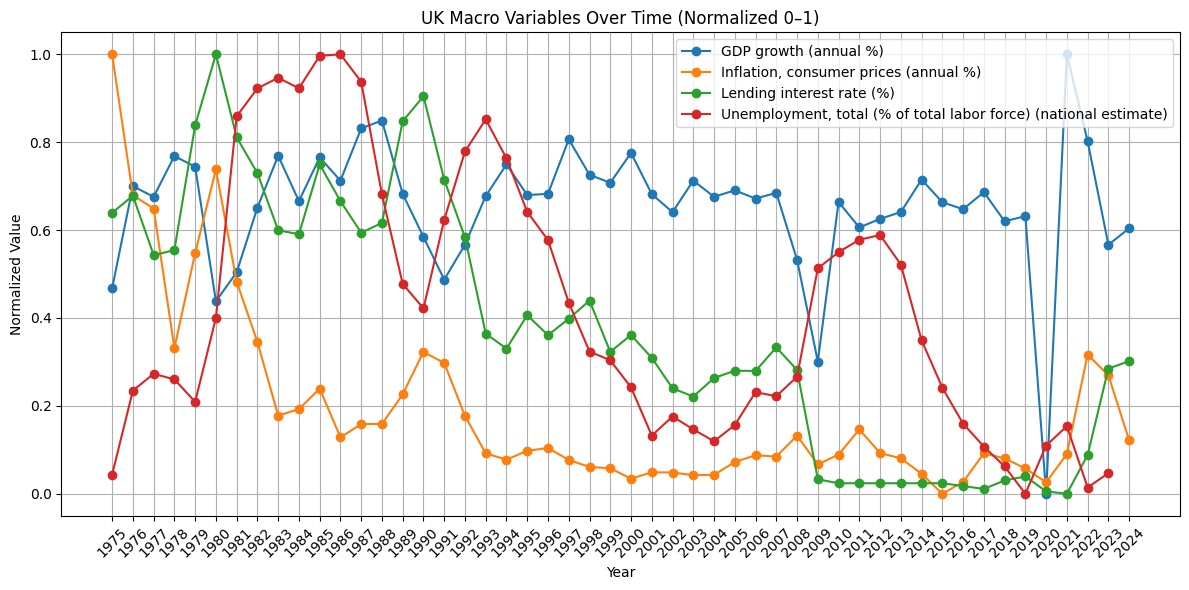

In [128]:
# Convert all columns except 'Year' to numeric (in case of strings)
cols_to_normalize = df.columns.drop(['Year','GDP (constant LCU)'])
df[cols_to_normalize] = df[cols_to_normalize].apply(pd.to_numeric, errors='coerce')

# Normalize columns (min-max)
df_norm = df.copy()
df_norm[cols_to_normalize] = (df[cols_to_normalize] - df[cols_to_normalize].min()) / (df[cols_to_normalize].max() - df[cols_to_normalize].min())

# Plot normalized values
plt.figure(figsize=(12, 6))
for col in cols_to_normalize:
    plt.plot(df_norm['Year'], df_norm[col], marker='o', label=col)
    
plt.xticks(df['Year'][::5], rotation=45)

plt.title("UK Macro Variables Over Time (Normalized 0–1)")
plt.xlabel("Year")
plt.ylabel("Normalized Value")
plt.legend()
plt.xticks(rotation=45)
plt.xticks(df['Year'])
plt.grid(True)
plt.tight_layout()
plt.show()

Some years show negative GDP growth despite low unemployment, highlighting external shocks like COVID-19 in 2020, and the potential benefits of adding a lag variable.

High inflation years coincide with high lending rates, reflecting monetary tightening to control inflation.

Extreme recession events such as in 2009 and 2020 show sharp GDP declines. While macro features explain trends, external shocks can have large effects that the models were not able to predict.

# Section 4: Data Modeling

# Model Data

Linear Regression Machine Learning Model

Remainder of code in notebook is adapted from Udacity Data Scientist Nanodegree- Course 2 Introduction to Data Science and Supervised Machine Learning - Exercise Solution: Predicting Diabetes

First split the data into features and labels. Let X be the features we will use in the model and y be the target variable

In [136]:
# Split the data into features and labels
X = df.drop(['Year','GDP growth (annual %)','GDP (constant LCU)'], axis=1)
y = df.set_index('Year')["GDP growth (annual %)"]

Split the data, so that 75% of the data is training data, and 25% is test data

In [137]:
# Split your data with these ratios: train: 0.75 | test: 0.25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [138]:
# Train a linear regression model on the training set
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

# Visualise Data

In [139]:
# Make predictions on the training and test set
linear_predictions_train = linear_model.predict(X_train)
linear_predictions_test = linear_model.predict(X_test)
print(linear_predictions_test[:10])

[2.38559475 2.26619505 2.25682753 1.47004655 2.52579503 2.65415062
 2.53301429 1.91991476 2.42254372 1.49115204]


In [140]:
# Compare the predictions with the actual values
print(y_test[:10].values)

[  5.39273832   3.19463732   2.26910519   4.83908518   2.38069403
   3.15234652   5.73241357   0.39708235 -10.29691886  -0.78774387]


In [141]:
# Calculate the relative error of these predictions
relative_errors = np.abs(linear_predictions_test - y_test) / y_test * 100
print("Relative errors in per cent: ", relative_errors[:10].values)

Relative errors in per cent:  [  55.76283132   29.06252509    0.54107923   69.62139549    6.09490299
   15.80397006   55.81242944  383.50544367 -123.52687972 -289.29401939]


The relative errors show how large the error is compared to the actual value. Lower the relative errors the better. The relative errors demonstrates varying degrees of accuracy.

Business Question: How well can the model handle external shocks?
Answer: Not well. There was a shock in 2020, which has a relative error of -124.19%. To improve this, furture models should experiment with different features, to observe if this can be mitigated.

In [117]:
# Calculate the root mean squared error on the training and test set
from sklearn.metrics import root_mean_squared_error
rmse_train = root_mean_squared_error(y_train, linear_predictions_train)
print(rmse_train)
rmse_test = root_mean_squared_error(y_test, linear_predictions_test)
print(rmse_test)

2.0822075884828934
3.9421441970090916


RMSE can be used to gauge overall model accuracy, rather than indinvidual data points like the relative errors. Tells us how far, on average, predictions are from true values, with larger errors penalised more (because of the square)

# Section 5: Evaluate the Results

# Question 1:  How accurately can we forecast UK GDP growth using macroeconomic features like inflation, unemployment, lending rates, and consumer prices?

Section 4 of this notebook demonstrated modeling data using a linear regression model. From here, we were able to extract 10 values showing the relative errors:

Relative errors in per cent:  [  55.76283132   29.06252509    0.54107923   69.62139549    6.09490299
   15.80397006   55.81242944  383.50544367 -123.52687972 -289.29401939]
   
Relative errors are errors relative to the true value. A lower values shows increased accuracy; in these data points, the data ranges from 0.5410793% to 383.5%.

To gain a more overall understanding of our model accuracy, we can use RMSE. RMSE measures the average prediction error:

RMSE of training set = 2.0822075884828934

RMSE of test set = 3.9421441970090916

The RMSE of training set shows model fits training data reasonably well wih moderate error.
There is a higher error on test data, indicating the model is less accurate on unseen data. This can be due to underfitting or some variance due to fluctuations in economic data. 

We can conclude, due to the gap between the training set and test set is reasonably small, the model is reasonably accurate, but there is room for improvement, perhaps via implementing additional features.

# Question 2: What relationships do we observe between our macroeconomic features and GDP growth rate?

Section 3 of this notebook shows visualisations that allow us the observe the relationships

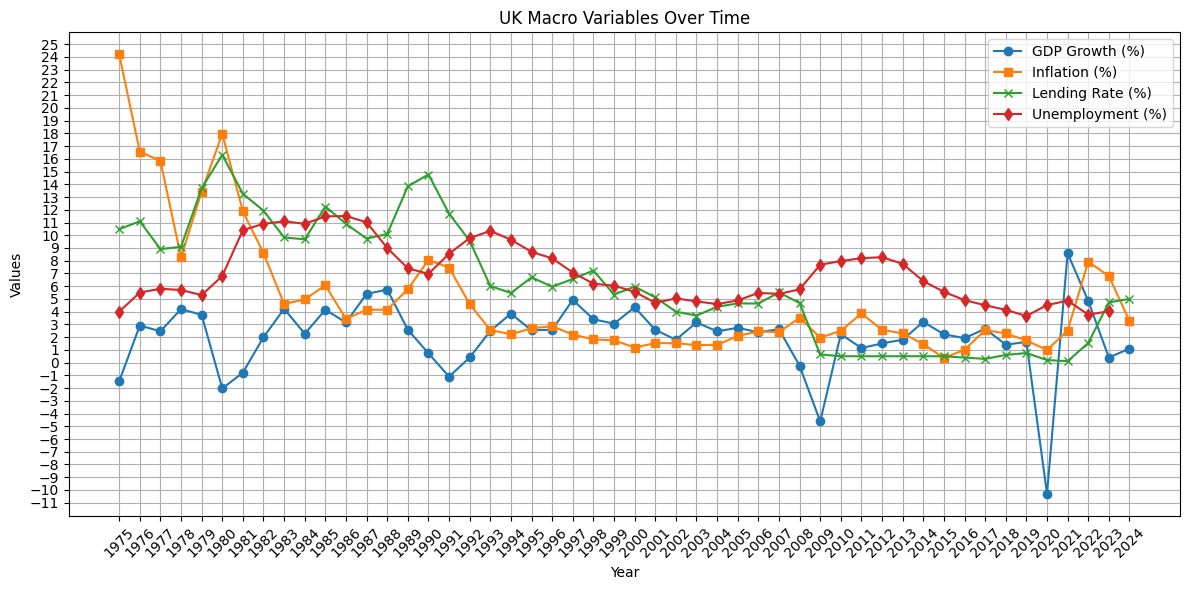

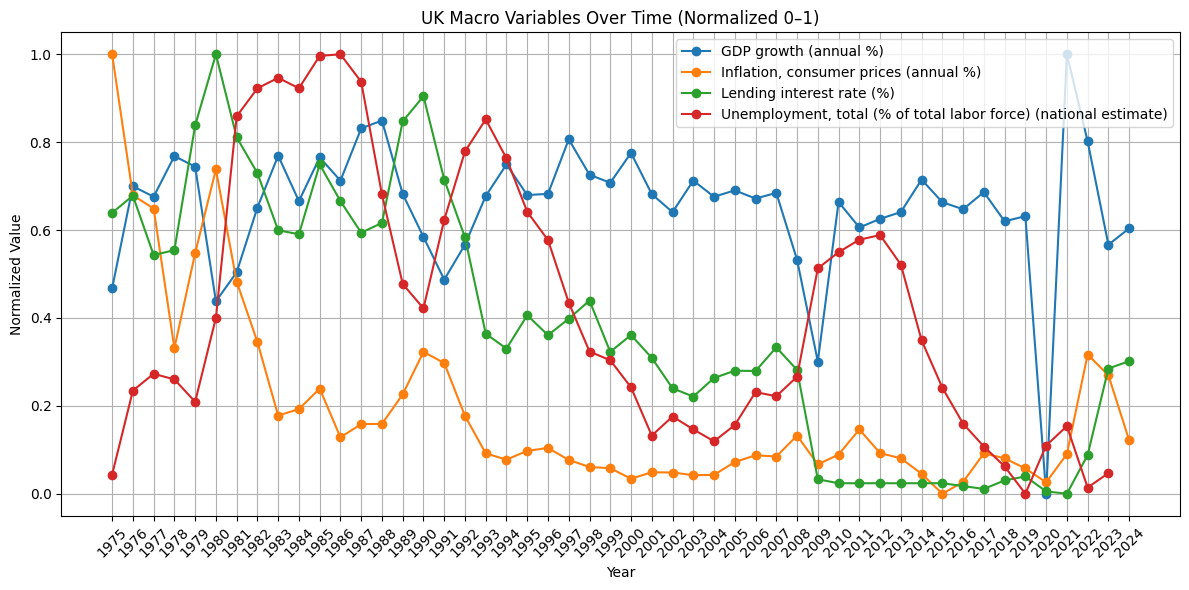


Some years show negative GDP growth despite low unemployment, highlighting external shocks like COVID-19 in 2020, and the potential benefits of adding a lag variable.

High inflation years coincide with high lending rates, reflecting monetary tightening to control inflation.

Extreme recession events such as in 2009 and 2020 show sharp GDP declines. While macro features explain trends, external shocks can have large effects that the models were not able to predict.


Overall, there is not a single descriptive sentence that can be used to describe the relationship that is consistent over the 50 years. For a majority of the data points, unemployment and lending interest rate has an inverse relationship with GDP growth as expected in theory. GDP growth reacts with a lag to changes in interest rates or unemployment; to develop the model further, one could benefit from adding lagged variables.

# Business Question 3: How well can the model handle external shocks?

One of the most reccent external shock that has occurred was during 2020, the COVID-19 pandemic. We can observe the relative errors as seen in Section 4 for 2020

In [142]:
relative_errors.head(15)

Year
1987     55.762831
2014     29.062525
1984      0.541079
2022     69.621395
2006      6.094903
2003     15.803970
1988     55.812429
2023    383.505444
2020   -123.526880
1981   -289.294019
2011     55.965688
1998     17.228627
2012     31.008388
Name: GDP growth (annual %), dtype: float64

In 2020, the relative error was -123.5%; this is a high error, especially in relation to other years such as 1984 having an error or 0.54%. We conclude that the model cannot handle external shocks that well, most likely due to the macro-features we use to model this takes time to change (i.e. unemployment does not increase straight away when faced with an extternal shock like COVID-19). An improvement of this model would be to add lagged features to it.